<a href="https://colab.research.google.com/github/SK-Sridhar/glbio2025-headct.github.io/blob/main/Session4/GLBIOSession4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Fundamentals of Head CT Image Processing with SITK**

> Manipulating spatial and intensity properties of CT images are a prerequisite for all stuctural neuroimaging research pipelines. This session will introduce the fundamentals of such manipulations using Simple Insights Toolkit (SITK).

[Github link to notebook and sample data](https://github.com/SK-Sridhar/glbio2025-headct.github.io)

In [ ]:
# Not to be used unless direct linking to shared google drive does not work
# from google.colab import drive
# drive.mount('/content/drive')
# file_path = "/content/drive/My Drive/GLBIOSession4Data"

Summon The Analytical Gods

<img src = "https://docs.google.com/uc?export=download&id=1UtWX_XSXrMmg43D6KBjAWQx5IDYJ0dDL" width = "100 px" height = "100 px">



In [ ]:
!pip install pandas numpy matplotlib SimpleITK gdown

In [ ]:
import SimpleITK as sitk # The master of medical image manipulation
import pandas as pd # The keeper of tabular wisdom
import numpy as np # The essence of numerical sorcery
import matplotlib.pyplot as plt # The grand artisan of visual storytelling
import copy, gdown, os, re, time #The boring, but important guys

Read Sample Data

In [ ]:
sample_img_url = 'https://drive.google.com/uc?id=10IH6HtOrO_YxTCI6p8GrGa1FsKDlRfoG'
sample_img_name = 'CT PRE CONTRAST 5MM STD.nii'
sample_img_save_path = os.path.join('/content', sample_img_name)

#reference image/template
ref_img_url = 'https://drive.google.com/uc?id=1BSF8CjCE1Zuvn0wvtydKSCzcG650hmJE'
ref_img_name = 'TemplateCtElderly.nii.gz'
ref_img_save_path = os.path.join('/content', ref_img_name)

In [ ]:
gdown.download(sample_img_url, sample_img_save_path, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=10IH6HtOrO_YxTCI6p8GrGa1FsKDlRfoG
To: /content/CT PRE CONTRAST 5MM STD.nii
100%|██████████| 14.7M/14.7M [00:00<00:00, 71.9MB/s]


'/content/CT PRE CONTRAST 5MM STD.nii'

In [ ]:
gdown.download(ref_img_url, ref_img_save_path, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1BSF8CjCE1Zuvn0wvtydKSCzcG650hmJE
From (redirected): https://drive.google.com/uc?id=1BSF8CjCE1Zuvn0wvtydKSCzcG650hmJE&confirm=t&uuid=805fd7c6-7cd9-474e-a13c-0b3b34434a1d
To: /content/TemplateCtElderly.nii.gz
100%|██████████| 1.06M/1.06M [00:00<00:00, 9.82MB/s]


'/content/TemplateCtElderly.nii.gz'

In [ ]:
#Check if you have successfully downloaded the sample scans 'CT PRE CONTRAST 5MM STD.nii' and 'TemplateCtElderly.nii.gz'
print(os.listdir('/content/'))

['.config', 'CT PRE CONTRAST 5MM STD.nii', 'TemplateCtElderly.nii.gz', 'sample_data']


Images in SITK – objects with attributes that describe complete mapping between image data and physical spaces

<img src = "https://docs.google.com/uc?export=download&id=1zPxX9QXZ7l8mq3GSiQrdy6k6dSzrXRQH" width = "500 px" height = "400 px">

In [ ]:
#Read in sample image (CT negative)
img = sitk.ReadImage('/content/CT PRE CONTRAST 5MM STD.nii')

In [ ]:
#Access value in a particular location (i, j, k)
print(img.GetPixel((50,29,14)))

-3024


In [ ]:
#Set value
img.SetPixel((50, 29, 14), 1)
#Check set value
print(img.GetPixel((50,29,14)))

1


In [ ]:
#Reset value
img.SetPixel((50, 29, 14), -3024)

In [ ]:
#Dimensions of the image
img.GetSize()

(512, 512, 28)

In [ ]:
#what physical distance does one increment in image coordinates correspond to?
img.GetSpacing()

(0.4101560115814209, 0.4101560115814209, 5.0)

In [ ]:
#How do the image's axes map to physical axes?
#Nifti images use the RAS convention
np.array(img.GetDirection()).reshape(3,3)

array([[ 1.,  0.,  0.],
       [ 0., -1.,  0.],
       [ 0.,  0.,  1.]])

In [ ]:
#Where is the origin to the world/physical coordinates system?
img.GetOrigin()

(-105.0, 66.48971557617188, -39.25)

In [ ]:
#Moving from world/physical coordinates to image coordinates
print(img.TransformPhysicalPointToContinuousIndex(img.GetOrigin()))

print(img.TransformPhysicalPointToContinuousIndex([x + y for x,y in zip(img.GetOrigin(), img.GetSpacing())]))

print(img.TransformPhysicalPointToContinuousIndex([x + 3*y for x,y in zip(img.GetOrigin(), img.GetSpacing())]))

(0.0, 0.0, 0.0)
(1.0, -1.0, 1.0)
(3.0, -3.0, 3.0)


In [ ]:
#Moving from image to world coordinates
print(img.TransformContinuousIndexToPhysicalPoint((0,0,0))) #notice that this corresponds to the origin

print(img.TransformContinuousIndexToPhysicalPoint((1,1,1)))

print(img.TransformContinuousIndexToPhysicalPoint((2,2,2)))

(-105.0, 66.48971557617188, -39.25)
(-104.58984398841858, 66.07955956459045, -34.25)
(-104.17968797683716, 65.66940355300903, -29.25)


###### Accessing the image as a numpy array

In [ ]:
img_arr = sitk.GetArrayFromImage(img)

In [ ]:
img_arr.shape, img.GetSize() #note how the dimensions are transposed as compared to the image object

((28, 512, 512), (512, 512, 28))

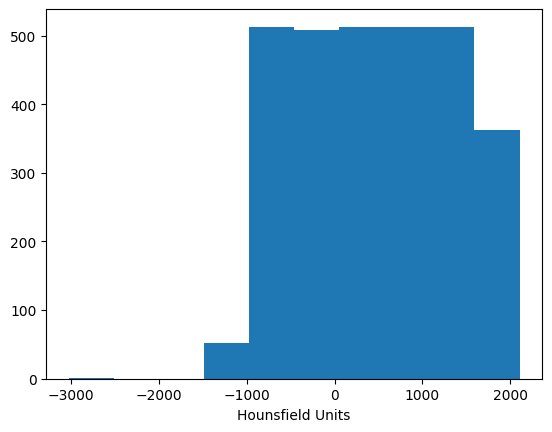

In [ ]:
plt.hist(np.unique(img_arr).flatten())
plt.xlabel('Hounsfield Units')
plt.show()

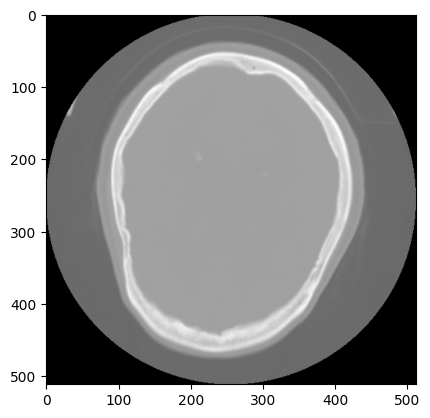

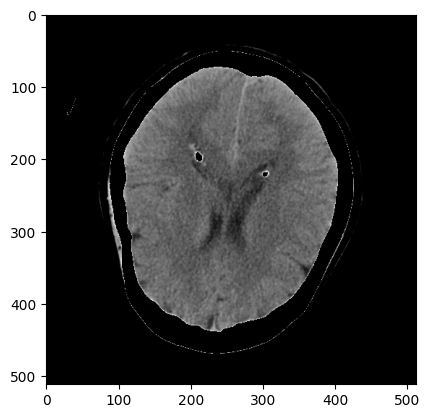

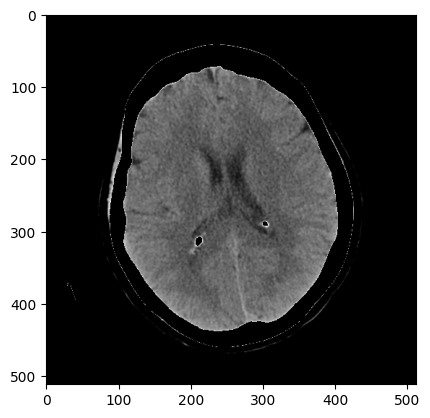

In [ ]:
plt.imshow(img_arr[img_arr.shape[0]//2, :, :], cmap = 'gray')
plt.show()
#Windowing the image to 0 - 100 HU for better visual contrast
img_arr_win = np.where((img_arr < 0)|(img_arr > 100), 0, img_arr)
plt.imshow(img_arr_win[img_arr_win.shape[0]//2, :, :], cmap = 'gray')
plt.show()
#Flipped the row order for up-right visualization
plt.imshow(img_arr_win[img_arr_win.shape[0]//2, ::-1, :], cmap = 'gray')
plt.show()

Rigid transformations

Translation use case: Center-align two images

In [ ]:
#Read in the reference image (stored at ref_img_path) below
ref_img = sitk.ReadImage('/content/TemplateCtElderly.nii.gz')

In [ ]:
#Infer the centers of the sample and reference images, by converting the center of the image array to world coordinates
img_arr_cen = [x//2 for x in img_arr.shape[::-1]] #get image center point, notice how image dimensions are flipped
img_center =  img.TransformContinuousIndexToPhysicalPoint(img_arr_cen)#transform image center to physical center

In [ ]:
ref_arr =  sitk.GetArrayFromImage(ref_img) #get reference image array
ref_arr_cen =  [x/2 for x in ref_img.GetSize()] #get reference image center point
ref_center =  ref_img.TransformContinuousIndexToPhysicalPoint(ref_arr_cen)#transform image center to physical center

In [ ]:
ref_img.TransformContinuousIndexToPhysicalPoint(ref_arr_cen), ref_img.TransformContinuousIndexToPhysicalPoint([x/2 for x in ref_img.GetSize()])

((-0.5, 17.5, 18.5), (-0.5, 17.5, 18.5))

In [ ]:
print(img_center, ref_center)

(-6.103515625e-05, -38.510223388671875, 30.75) (-0.5, 17.5, 18.5)


In [ ]:
#Calculate the translation required to move the sample image to align with the center of the reference image
translation = [(x-y) for x,y in zip(img_center, ref_center)]
print(translation)

[0.49993896484375, -56.010223388671875, 12.25]


In [ ]:
def translate_resample(img, translation, dimension = 3):
    translation_transform = sitk.AffineTransform(dimension)
    #Notice that the image center coordinates are derived by flipping the halved size
    translation_transform.SetCenter(img.TransformContinuousIndexToPhysicalPoint([x//2 for x in img.GetSize()[::-1]]))
    translation_transform.SetTranslation(translation)

    #Get physical boundaries of image
    extreme_points = [img.TransformIndexToPhysicalPoint((0,0,0)),
                  img.TransformIndexToPhysicalPoint((img.GetWidth(),0,0)),
                  img.TransformIndexToPhysicalPoint((img.GetWidth(),img.GetHeight(),0)),
                  img.TransformIndexToPhysicalPoint((0,img.GetHeight(),0)),
                  img.TransformIndexToPhysicalPoint((0,0,img.GetDepth())),
                  img.TransformIndexToPhysicalPoint((img.GetWidth(),0,img.GetDepth())),
                  img.TransformIndexToPhysicalPoint((img.GetWidth(),img.GetHeight(),img.GetDepth())),
                  img.TransformIndexToPhysicalPoint((0,img.GetHeight(),img.GetDepth()))]

    #Derive the translated locations of the boundary points, notice how the inverse of the translation transform is used.
    #In SITK, transformations are applied from
    inv_transform = translation_transform.GetInverse()

    extreme_points_transformed = [inv_transform.TransformPoint(pnt) for pnt in extreme_points]
    min_x = min(extreme_points_transformed)[0]
    min_y = min(extreme_points_transformed, key=lambda p: p[1])[1]
    min_z = min(extreme_points_transformed, key=lambda p: p[2])[2]
    max_x = max(extreme_points_transformed)[0]
    max_y = max(extreme_points_transformed, key=lambda p: p[1])[1]
    max_z = max(extreme_points_transformed, key=lambda p: p[2])[2]

    output_origin = [min_x, min_y, min_z]


    output_spacing = img.GetSpacing()
    output_direction = [1,0,0,0,1,0,0,0,1]

    #Define the resample function with a desired interpolator

    translated_img = sitk.Resample(img, img.GetSize(), translation_transform, sitk.sitkLinear, output_origin,
                               output_spacing, output_direction)

    return translated_img

In [ ]:
translated_img = translate_resample(img, translation, dimension = 3)
translated_img_arr = sitk.GetArrayFromImage(translated_img)

In [ ]:
#Check if your goal of center aligning the sample image to the reference image is achieved
print(translated_img.TransformContinuousIndexToPhysicalPoint([x//2 for x in translated_img.GetSize()]))

print(ref_center)

(-0.5, 17.5, 18.5)
(-0.5, 17.5, 18.5)


In [ ]:
#Translation should not affect values in the image array. Why is this not so?
(img_arr == translated_img_arr).all()

np.False_

In [ ]:
translated_img.GetDirection(), img.GetDirection()

((1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0),
 (1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0))

In [ ]:
#Recall that this is a NIfTI image, which uses the RAS convention system, meaning we move anterior as the y coordinate
#increases, and move right as the x coordinate increases. Notice there is some extra-cranial tissue on the left side of
#the original image, which is going to be interpreted as the right side of the patient's head in the translated image.

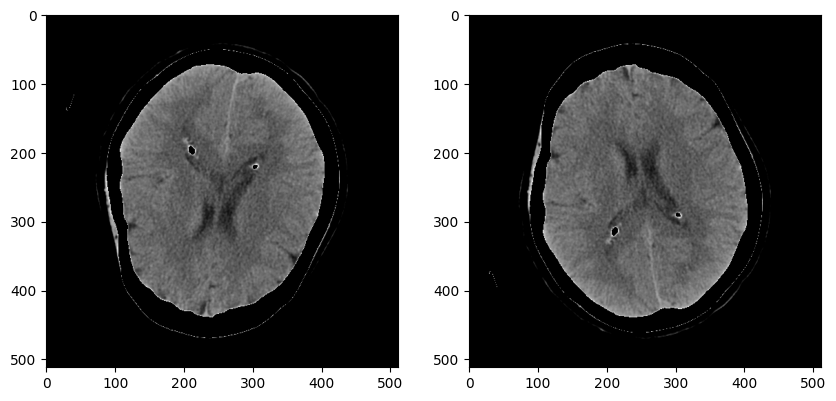

In [ ]:
translated_img_arr_win = np.where((translated_img_arr < 0) | (translated_img_arr > 100), 0 , translated_img_arr)
fig, ax = plt.subplots(figsize = (10,20), ncols = 2, nrows = 1)
ax[0].imshow(img_arr_win[img_arr_win.shape[0]//2,:,:], cmap = 'gray')
ax[1].imshow(translated_img_arr_win[translated_img_arr.shape[0]//2,:,:], cmap = 'gray')
plt.show()

In [ ]:
#Can we just set the direction explicitly?
translated_img.SetDirection([1,0,0,0,-1,0,0,0,1])

In [ ]:
translated_img_arr = sitk.GetArrayFromImage(translated_img)
(img_arr == translated_img_arr).all()

np.False_

In [ ]:
#Resetting changes only the interpretation of the image's axes, and does not resample the image in the right orientation

In [ ]:
def translate_resample_with_original_dc(img, translation, dimension = 3):
    """ Copy the function "translate_resample" here and manipulate it such that the image's direction cosine is preserved following translation"""

    return translated_img

In [ ]:
translated_img_org_dc = translate_resample_with_original_dc(img, translation, dimension = 3)

In [ ]:
#Check if your goal of center aligning the sample image to the reference image is achieved
print(translated_img_org_dc.TransformContinuousIndexToPhysicalPoint([x//2 for x in translated_img_org_dc.GetSize()]))

print(ref_center)

(-0.5, 17.5, 18.5)
(-0.5, 17.5, 18.5)


In [ ]:
translated_img_org_dc_arr = sitk.GetArrayFromImage(translated_img_org_dc)

In [ ]:
(translated_img_org_dc_arr == img_arr).all()

np.True_

In [ ]:
translated_img_org_dc.GetDirection()

(1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0)

In [ ]:
translated_img_org_dc_arr_win = np.where((translated_img_org_dc_arr < 0) | (translated_img_org_dc_arr > 100), 0 , translated_img_org_dc_arr)

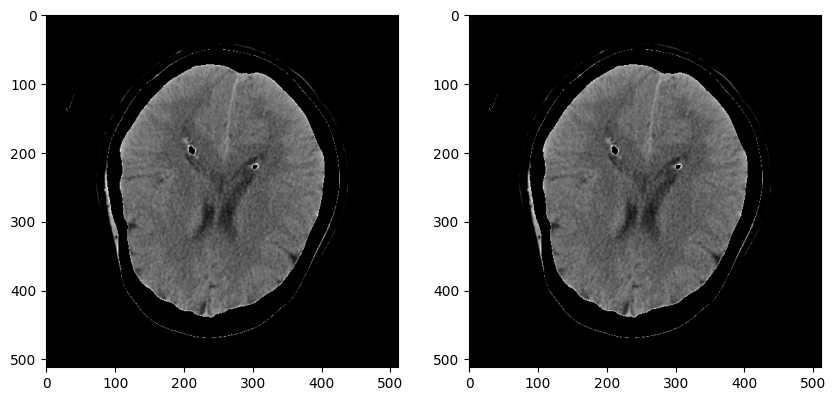

In [ ]:
fig, ax = plt.subplots(figsize = (10,20), ncols = 2, nrows = 1)
ax[0].imshow(img_arr_win[img_arr_win.shape[0]//2,:,:], cmap = 'gray')
ax[1].imshow(translated_img_org_dc_arr_win[translated_img_org_dc_arr_win.shape[0]//2,:,:], cmap = 'gray')
plt.show()

Rotation use case: Rotating images and landmarks by prespecified angles (often used in creating augmentated versions of images for deep learning models)

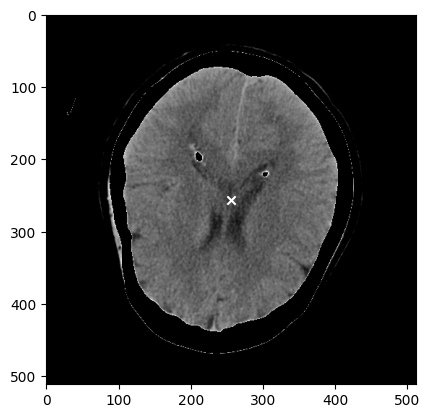

In [ ]:
plt.imshow(img_arr_win[img_arr_win.shape[0]//2,:,:], cmap = 'gray')
plt.scatter(img_arr_win.shape[1]//2, img_arr_win.shape[2]//2, color = 'white', marker = 'x')
plt.show()

In [ ]:
(img_arr_win.shape[2]//2, img_arr_win.shape[1]//2, img_arr_win.shape[0]//2), img_center

((256, 256, 14), (-6.103515625e-05, -38.510223388671875, 30.75))

In [ ]:
#How do we apply a 3D rotation to this image?

In [ ]:
def rotate_resample(image, landmarks, angles, resampling_type = 'linear', dimension = 3):

    assert len(angles) == dimension

    theta_radians_x, theta_radians_y, theta_radians_z  = np.deg2rad(angles[0]), np.deg2rad(angles[1]), np.deg2rad(angles[2])

    transform_x = sitk.AffineTransform(dimension)
    transform_x.SetCenter(image.TransformContinuousIndexToPhysicalPoint(np.array(image.GetSize())//2.0))

    transform_y = sitk.AffineTransform(dimension)
    transform_y.SetCenter(image.TransformContinuousIndexToPhysicalPoint(np.array(image.GetSize())//2.0))

    transform_z = sitk.AffineTransform(dimension)
    transform_z.SetCenter(image.TransformContinuousIndexToPhysicalPoint(np.array(image.GetSize())//2.0))



    matrix_x = np.array([[1.0, 0.0, 0.0],
                         [0.0, np.cos(theta_radians_x), -np.sin(theta_radians_x)],
                         [0.0, np.sin(theta_radians_x), np.cos(theta_radians_x)]]) #rotation around the x axis

    matrix_y = np.array([[np.cos(theta_radians_y), 0.0, np.sin(theta_radians_y)],
                         [0.0, 1.0, 0.0],
                         [-np.sin(theta_radians_y), 0.0, np.cos(theta_radians_y)]])  #rotation around the y axis

    matrix_z = np.array([[np.cos(theta_radians_z), -np.sin(theta_radians_z), 0.0],
                         [np.sin(theta_radians_z),  np.cos(theta_radians_z), 0.0],  #rotation around the z axis
                         [0.0, 0.0, 1.0]])

    matrix_cor = np.array(image.GetDirection()).reshape(3,3)

    transform_x.SetMatrix(matrix_x.ravel())
    transform_y.SetMatrix(matrix_y.ravel())
    transform_z.SetMatrix(matrix_z.ravel())

    composite_transform = sitk.CompositeTransform([transform_x, transform_y, transform_z])


    extreme_points = [image.TransformIndexToPhysicalPoint((0,0,0)),
                      image.TransformIndexToPhysicalPoint((image.GetWidth(),0,0)),
                      image.TransformIndexToPhysicalPoint((image.GetWidth(),image.GetHeight(),0)),
                      image.TransformIndexToPhysicalPoint((0,image.GetHeight(),0)),
                      image.TransformIndexToPhysicalPoint((0,0,image.GetDepth())),
                      image.TransformIndexToPhysicalPoint((image.GetWidth(),0,image.GetDepth())),
                      image.TransformIndexToPhysicalPoint((image.GetWidth(),image.GetHeight(),image.GetDepth())),
                      image.TransformIndexToPhysicalPoint((0,image.GetHeight(),image.GetDepth()))]


    inv_transform = composite_transform.GetInverse()

    extreme_points_transformed = [inv_transform.TransformPoint(pnt) for pnt in extreme_points]
    min_x = min(extreme_points_transformed)[0]
    min_y = min(extreme_points_transformed, key=lambda p: p[1])[1]
    min_z = min(extreme_points_transformed, key=lambda p: p[2])[2]
    max_x = max(extreme_points_transformed)[0]
    max_y = max(extreme_points_transformed, key=lambda p: p[1])[1]
    max_z = max(extreme_points_transformed, key=lambda p: p[2])[2]


    landmarks_transformed = inv_transform.TransformPoint(landmarks)

    # Use the original spacing
    output_spacing = image.GetSpacing()
    # Original image's direction
    output_direction = image.GetDirection()
    #New origin
    output_origin = [min_x, max_y, min_z]

    output_size = image.GetSize()

    if resampling_type == 'linear':
        resampler = sitk.sitkLinear
    else:
        resampler = sitk.sitkBSpline

    rotated_image = sitk.Resample(image, output_size, composite_transform, resampler, output_origin, output_spacing,
                                  output_direction)

    return rotated_image, landmarks_transformed

In [ ]:
rotated_img, landmarks_transformed = rotate_resample(img, img_center, (10, 15, 10))
rotated_img_arr = sitk.GetArrayFromImage(rotated_img)
rotated_img_arr_win = np.where((rotated_img_arr < 0) | (rotated_img_arr > 100), 0, rotated_img_arr)

In [ ]:
#Also rotate desired landmarks accordingly
landmarks_transformed_img_coords = rotated_img.TransformPhysicalPointToContinuousIndex(landmarks_transformed)

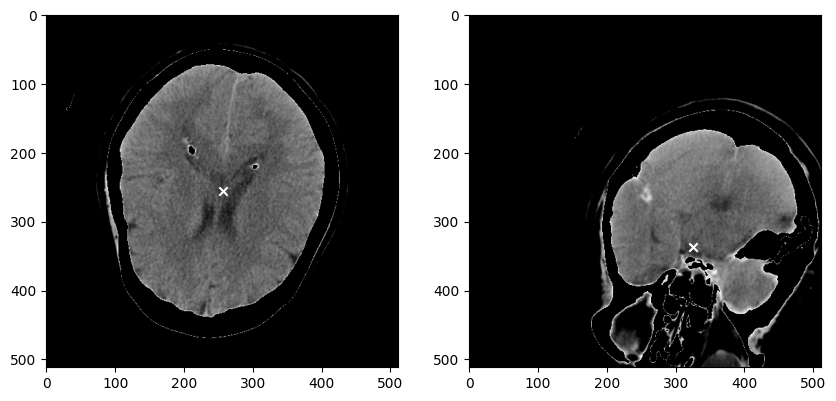

In [ ]:
fig, ax = plt.subplots(figsize = (10,20), ncols = 2, nrows = 1)
ax[0].imshow(img_arr_win[img_arr_win.shape[0]//2, :, :], cmap = 'gray')
ax[0].scatter(img_arr_win.shape[1]//2, img_arr_win.shape[2]//2, color = 'white', marker = 'x')
ax[1].imshow(rotated_img_arr_win[rotated_img_arr_win.shape[0]//2, :, :], cmap = 'gray')
ax[1].scatter(landmarks_transformed_img_coords[1], landmarks_transformed_img_coords[0], color = 'white', marker = 'x')
plt.show()

In [ ]:
#Examine difference in resampled image quality based on the interpolator used, especially in high density focal spots

In [ ]:
rotated_img_bspline, _ = rotate_resample(img, img_center, (10, 15, 10), 'bspline')
rotated_img_bspline_arr = sitk.GetArrayFromImage(rotated_img_bspline)
rotated_img_bspline_arr_win = np.where((rotated_img_bspline_arr < 0) | (rotated_img_bspline_arr > 100), 0, rotated_img_bspline_arr)

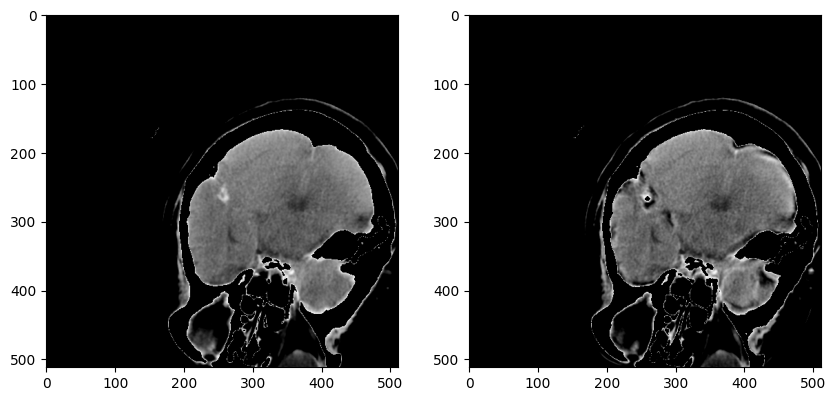

In [ ]:
fig, ax = plt.subplots(figsize = (10,20), ncols = 2, nrows = 1)
ax[0].imshow(rotated_img_arr_win[rotated_img_arr_win.shape[0]//2, :, :], cmap = 'gray')
ax[1].imshow(rotated_img_bspline_arr_win[rotated_img_bspline_arr_win.shape[0]//2, :, :], cmap = 'gray')
plt.show()

Scaling use case: Resizing images to required dimensions (often used to meet computational constraints in training deep
learning models)

In [ ]:
def resize_resample(image, target_size, dimension = 3):

    transform = sitk.AffineTransform(dimension)
    transform.SetCenter(image.TransformContinuousIndexToPhysicalPoint(np.array(image.GetSize())//2.0))
    #Notice how an affine transformation is always initialized with the identity matrix
    assert (np.array(transform.GetMatrix()).reshape(3,3) == np.eye(dimension)).all()

    extreme_points = [image.TransformIndexToPhysicalPoint((0,0,0)),
                      image.TransformIndexToPhysicalPoint((image.GetWidth(),0,0)),
                      image.TransformIndexToPhysicalPoint((image.GetWidth(),image.GetHeight(),0)),
                      image.TransformIndexToPhysicalPoint((0,image.GetHeight(),0)),
                      image.TransformIndexToPhysicalPoint((0,0,image.GetDepth())),
                      image.TransformIndexToPhysicalPoint((image.GetWidth(),0,image.GetDepth())),
                      image.TransformIndexToPhysicalPoint((image.GetWidth(),image.GetHeight(),image.GetDepth())),
                      image.TransformIndexToPhysicalPoint((0,image.GetHeight(),image.GetDepth()))]

    inv_transform = transform.GetInverse()

    extreme_points_transformed = [inv_transform.TransformPoint(pnt) for pnt in extreme_points]
    min_x = min(extreme_points_transformed)[0]
    min_y = min(extreme_points_transformed, key=lambda p: p[1])[1]
    min_z = min(extreme_points_transformed, key=lambda p: p[2])[2]
    max_x = max(extreme_points_transformed)[0]
    max_y = max(extreme_points_transformed, key=lambda p: p[1])[1]
    max_z = max(extreme_points_transformed, key=lambda p: p[2])[2]



    output_direction = img.GetDirection()
    output_origin = [min_x, max_y, min_z]

    # Compute resampled spacing based on the target size.
    output_spacing = [int(round(x*y/z)) for x,y,z in zip(image.GetSize(), image.GetSpacing(), target_size)]

    resampled_image = sitk.Resample(image, target_size, transform, sitk.sitkLinear, output_origin, output_spacing,
                                  output_direction)
    return resampled_image

In [ ]:
img.GetSize(), img.GetSpacing()

((512, 512, 28), (0.4101560115814209, 0.4101560115814209, 5.0))

In [ ]:
target_size = (256, 256, 100)
resized_image = resize_resample(img, target_size, dimension = 3)

In [ ]:
resized_image.GetSize(), resized_image.GetSpacing()

((256, 256, 100), (1.0, 1.0, 1.0))

In [ ]:
resized_image_arr = sitk.GetArrayFromImage(resized_image)
resized_image_arr_win = np.where((resized_image_arr < 0) | (resized_image_arr > 100), 0, resized_image_arr)

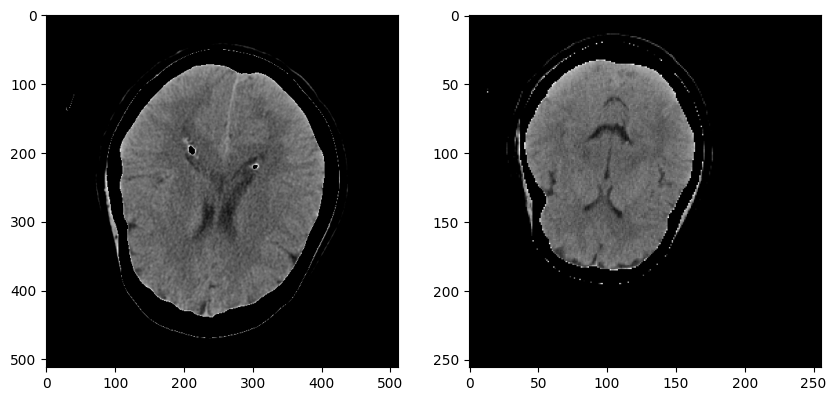

In [ ]:
#Notice that the central slices do not correspond to each other in the original and resized images
fig, ax = plt.subplots(figsize = (10,20), ncols = 2, nrows = 1)
ax[0].imshow(img_arr_win[img_arr_win.shape[0]//2, :, :], cmap = 'gray')
ax[1].imshow(resized_image_arr_win[resized_image_arr_win.shape[0]//2, :, :], cmap = 'gray')
plt.show()

In [ ]:
#Exercise - find the slice corresponding to the central slice in the original image

resized_center = resized_image.TransformPhysicalPointToContinuousIndex()

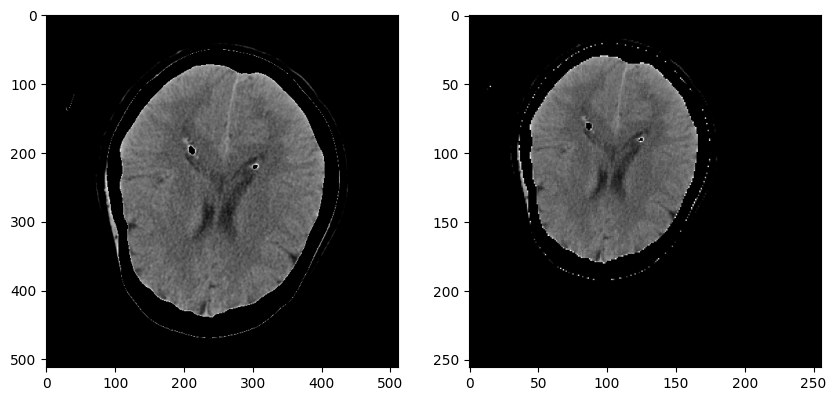

In [ ]:
fig, ax = plt.subplots(figsize = (10,20), ncols = 2, nrows = 1)
ax[0].imshow(img_arr_win[img_arr_win.shape[0]//2, :, :], cmap = 'gray')
ax[1].imshow(resized_image_arr_win[int(resized_center[2]), :, :], cmap = 'gray')
plt.show()

In [ ]:
def resample_img(image, target_spacing, dimension = 3):

    transform = sitk.AffineTransform(dimension)
    transform.SetCenter(image.TransformContinuousIndexToPhysicalPoint(np.array(image.GetSize())//2.0))
    #Notice how an affine transformation is always initialized with the identity matrix
    assert (np.array(transform.GetMatrix()).reshape(3,3) == np.eye(dimension)).all()

    extreme_points = [image.TransformIndexToPhysicalPoint((0,0,0)),
                      image.TransformIndexToPhysicalPoint((image.GetWidth(),0,0)),
                      image.TransformIndexToPhysicalPoint((image.GetWidth(),image.GetHeight(),0)),
                      image.TransformIndexToPhysicalPoint((0,image.GetHeight(),0)),
                      image.TransformIndexToPhysicalPoint((0,0,image.GetDepth())),
                      image.TransformIndexToPhysicalPoint((image.GetWidth(),0,image.GetDepth())),
                      image.TransformIndexToPhysicalPoint((image.GetWidth(),image.GetHeight(),image.GetDepth())),
                      image.TransformIndexToPhysicalPoint((0,image.GetHeight(),image.GetDepth()))]

    inv_transform = transform.GetInverse()

    extreme_points_transformed = [inv_transform.TransformPoint(pnt) for pnt in extreme_points]
    min_x = min(extreme_points_transformed)[0]
    min_y = min(extreme_points_transformed, key=lambda p: p[1])[1]
    min_z = min(extreme_points_transformed, key=lambda p: p[2])[2]
    max_x = max(extreme_points_transformed)[0]
    max_y = max(extreme_points_transformed, key=lambda p: p[1])[1]
    max_z = max(extreme_points_transformed, key=lambda p: p[2])[2]

    output_direction = img.GetDirection()
    output_origin = [min_x, max_y, min_z]

    # Compute resampled size based on the target spacing.
    # Remember, the physical dimensions of the images should remain same pre- and post-respacing - img_size x img_spacing = resampled_img_size x resampled_img_spacing
    output_size = []

    resampled_image = sitk.Resample(image, output_size, transform, sitk.sitkLinear, output_origin, target_spacing,
                                  output_direction)
    return resampled_image

In [ ]:
target_spacing = (1,1,1)
resampled_img = resize_resample(img, target_size, dimension = 3)

In [ ]:
resampled_img.GetSize(), resampled_img.GetSpacing()

((256, 256, 100), (1.0, 1.0, 1.0))

Skewing - Not prominently used in augmentation techniques

In [ ]:
def skew_resample(image, skew_values, dimension = 3):

  skew_transform = sitk.AffineTransform(dimension)
  skew_transform.SetCenter(image.TransformContinuousIndexToPhysicalPoint(np.array(image.GetSize()) // 2.0))

  skew_matrix = np.eye(dimension)
  for i in range(dimension):
    for j in range(i + 1, dimension):
      skew_matrix[i, j] = skew_values[j - i -1]

  skew_transform.SetMatrix(skew_matrix.ravel())


  extreme_points = [image.TransformIndexToPhysicalPoint((0,0,0)),
                    image.TransformIndexToPhysicalPoint((image.GetWidth(),0,0)),
                    image.TransformIndexToPhysicalPoint((image.GetWidth(),image.GetHeight(),0)),
                    image.TransformIndexToPhysicalPoint((0,image.GetHeight(),0)),
                    image.TransformIndexToPhysicalPoint((0,0,image.GetDepth())),
                    image.TransformIndexToPhysicalPoint((image.GetWidth(),0,image.GetDepth())),
                    image.TransformIndexToPhysicalPoint((image.GetWidth(),image.GetHeight(),image.GetDepth())),
                    image.TransformIndexToPhysicalPoint((0,image.GetHeight(),image.GetDepth()))]

  inv_transform = skew_transform.GetInverse()

  extreme_points_transformed = [inv_transform.TransformPoint(pnt) for pnt in extreme_points]
  min_x = min(extreme_points_transformed)[0]
  min_y = min(extreme_points_transformed, key=lambda p: p[1])[1]
  min_z = min(extreme_points_transformed, key=lambda p: p[2])[2]
  max_x = max(extreme_points_transformed)[0]
  max_y = max(extreme_points_transformed, key=lambda p: p[1])[1]
  max_z = max(extreme_points_transformed, key=lambda p: p[2])[2]


  output_direction = img.GetDirection()
  output_origin = [min_x, max_y, min_z]


  output_spacing = img.GetSpacing()
  output_size = [int(round((max_x - min_x) / output_spacing[0])),
                 int(round((max_y - min_y) / output_spacing[1])),
                 int(round((max_z - min_z) / output_spacing[2]))]

  resampled_image = sitk.Resample(image, img.GetSize(), skew_transform, sitk.sitkLinear, output_origin, output_spacing,
                                output_direction)


  return resampled_image

In [ ]:
skewed_image = skew_resample(img, (0.1, 0.2, 0.3))
skewed_img_arr = sitk.GetArrayFromImage(skewed_image)
skewed_img_arr_win = np.where((skewed_img_arr < 0) | (skewed_img_arr > 100), 0, skewed_img_arr)

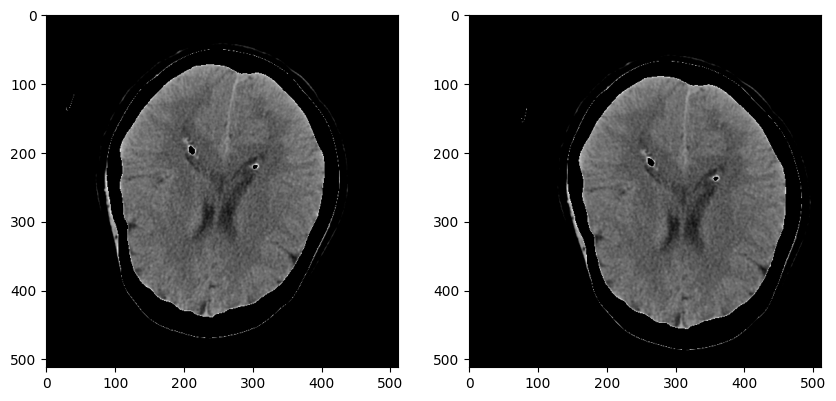

In [ ]:
fig, ax = plt.subplots(figsize = (10,20), ncols = 2, nrows = 1)
ax[0].imshow(img_arr_win[img_arr_win.shape[0]//2, :, :], cmap = 'gray')
ax[1].imshow(skewed_img_arr_win[skewed_img_arr_win.shape[0]//2, :, :], cmap = 'gray')
plt.show()

Manipulating density properties - Skull-stripping


1.   Smoothening
2.   Thresholding
3.   Erosion
4.   Retain Largest Connected Component
5.   Dilate
6.   Close holes
7.   Apply mask



In [ ]:
def gauss_smooth(input_img, sigma):
    """Returns gaussian smoothed image"""
    pixelID = input_img.GetPixelID()

    gaussian = sitk.SmoothingRecursiveGaussianImageFilter()
    gaussian.SetSigma(sigma)
    smoothed_img = gaussian.Execute(input_img)

    caster = sitk.CastImageFilter()
    caster.SetOutputPixelType(pixelID)
    smoothed_img = caster.Execute(smoothed_img)

    return smoothed_img

In [ ]:
def threshold_img(input_img, upper_thresh, lower_thresh):
    """Returns thresholded image mask (0-100 HU)"""
    pixelID = input_img.GetPixelID()
    seg = sitk.BinaryThreshold(input_img, lowerThreshold=lower_thresh, upperThreshold=upper_thresh,
                               insideValue=1, outsideValue=0)

    caster = sitk.CastImageFilter()
    caster.SetOutputPixelType(pixelID)
    seg = caster.Execute(seg)
    return seg

In [ ]:
def erode_img(input_img):
    """Erodes binary mask by 1mm3 """
    pixelID = input_img.GetPixelID()
    eroded_img = sitk.BinaryErode(input_img, (1,1,1), sitk.sitkBall, foregroundValue = 1.0, backgroundValue = 0.0)
    caster = sitk.CastImageFilter()
    caster.SetOutputPixelType(pixelID)
    eroded_img = caster.Execute(eroded_img)
    eroded_img.SetSpacing(input_img.GetSpacing())
    return eroded_img

In [ ]:
def keep_largest_cc(input_img):
    """Returns largest connected component from binary image """

    pixelID = input_img.GetPixelID()
    largestCC_img = sitk.RelabelComponent(sitk.ConnectedComponent(input_img))==1
    caster = sitk.CastImageFilter()
    caster.SetOutputPixelType(pixelID)
    largestCC_img = caster.Execute(largestCC_img)
    return largestCC_img

In [ ]:
def dilate_img(input_img, kernelSize):
    """Dilates mask by 1mm3"""
    pixelID = input_img.GetPixelID()
    dilated_img = sitk.BinaryDilate(input_img, (1,1,1), sitk.sitkBall, foregroundValue = 1.0, backgroundValue = 0.0)
    caster = sitk.CastImageFilter()
    caster.SetOutputPixelType(pixelID)
    dilated_img = caster.Execute(dilated_img)
    dilated_img.SetSpacing(input_img.GetSpacing())
    return dilated_img

In [ ]:
def morphology_close(input_img, ):
    """Closes any holes with spherical 1mm3 kernel"""
    pixelID = input_img.GetPixelID()
    closed_img = sitk.BinaryMorphologicalClosing(input_img,
                                            (1,1,1))

    caster = sitk.CastImageFilter()
    caster.SetOutputPixelType(pixelID)
    closed_img = caster.Execute(closed_img)
    return closed_img

In [ ]:
def skull_strip(input_img, closed_img_mask):
    """Applies the calculated mask - slice by slice"""
    closed_img_mask_arr = sitk.GetArrayFromImage(closed_img_mask)
    input_img_arr = sitk.GetArrayFromImage(input_img)
    skull_stripped_arr = np.zeros(input_img_arr.shape)
    for pl in range(len(input_img_arr)):
        skull_stripped_arr[pl,:,:] = closed_img_mask_arr[pl,:,:]*input_img_arr[pl,:,:]
    brain_img = sitk.GetImageFromArray(skull_stripped_arr)
    brain_img.SetSpacing(input_img.GetSpacing())
    brain_img.SetOrigin(input_img.GetOrigin())
    brain_img.SetDirection(input_img.GetDirection())
    return brain_img

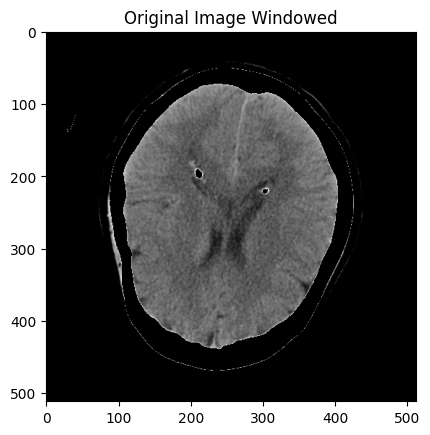

In [ ]:
#Why is windowing not useful in itself for skull-stripping?
plt.imshow(img_arr_win[img_arr_win.shape[0]//2,:,:],cmap = 'gray')
plt.title('Original Image Windowed')
plt.show()

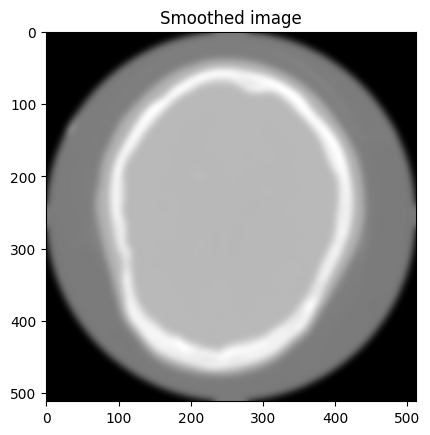

In [ ]:
smoothed_img = gauss_smooth(img, 2)
smoothed_img_arr = sitk.GetArrayFromImage(smoothed_img)
plt.imshow(smoothed_img_arr[smoothed_img_arr.shape[0]//2,:,:],cmap = 'gray')
plt.title('Smoothed image')
plt.show()

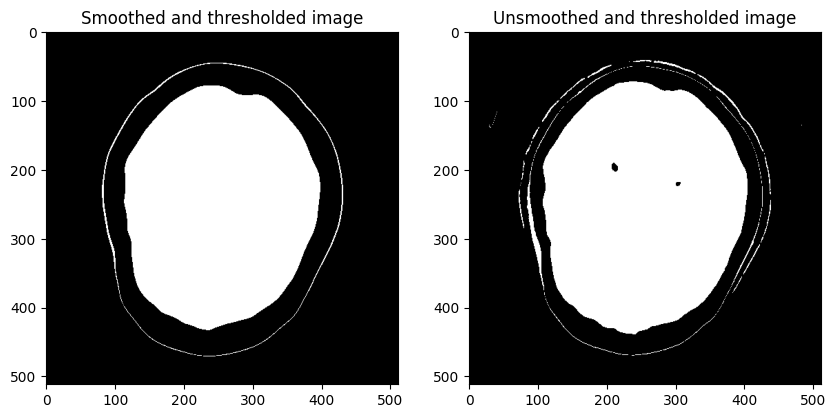

In [ ]:
thresh_img = threshold_img(smoothed_img, 100, 0)
thresh_img_arr = sitk.GetArrayFromImage(thresh_img)

thresh_img_unsmooth = threshold_img(img, 100, 0)
thresh_img_arr_unsmooth = sitk.GetArrayFromImage(thresh_img_unsmooth)

fig, ax = plt.subplots(figsize = (10,20), ncols = 2, nrows = 1)
ax[0].imshow(thresh_img_arr[thresh_img_arr.shape[0]//2,:,:],cmap = 'gray')
ax[1].imshow(thresh_img_arr_unsmooth[thresh_img_arr_unsmooth.shape[0]//2,:,:],cmap = 'gray')
ax[0].set_title('Smoothed and thresholded image')
ax[1].set_title('Unsmoothed and thresholded image')
plt.show()

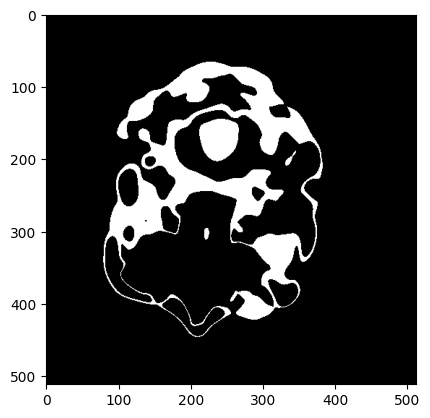

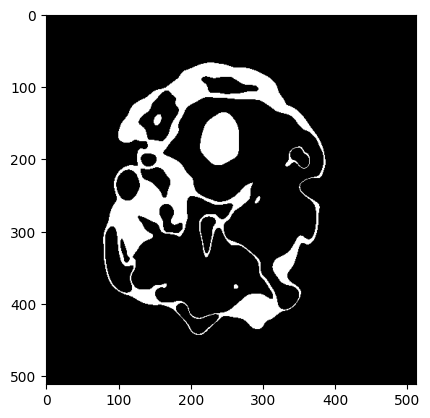

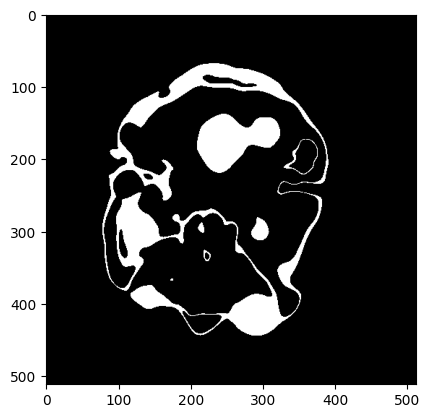

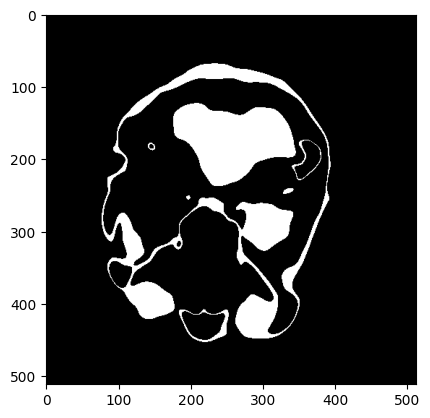

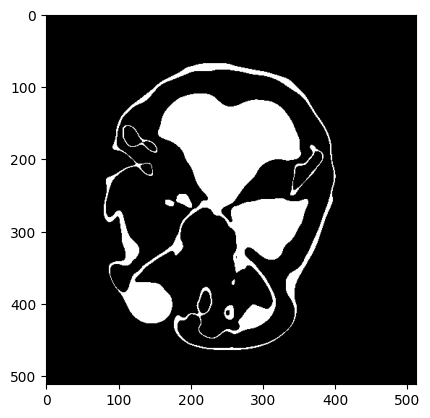

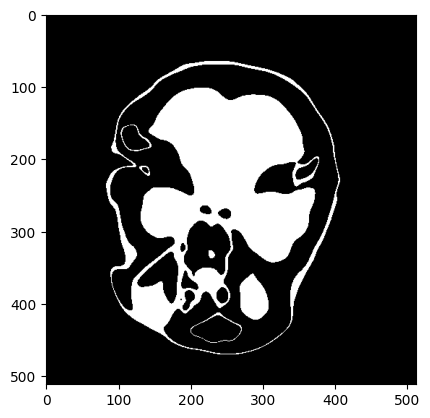

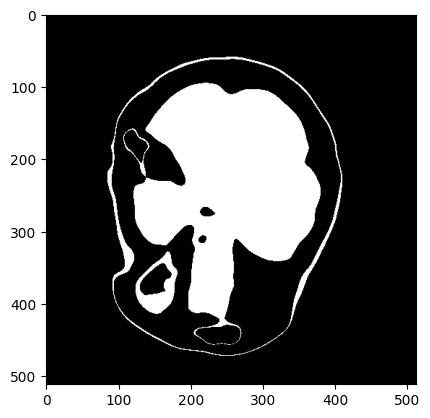

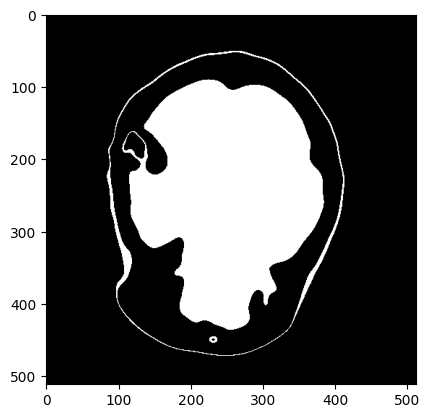

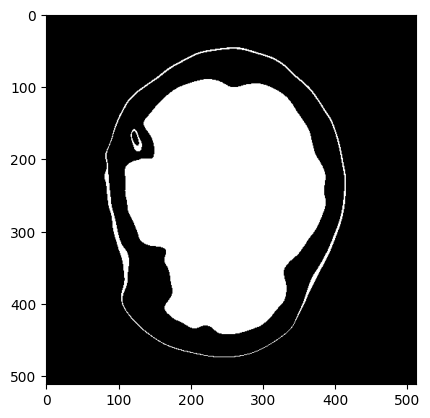

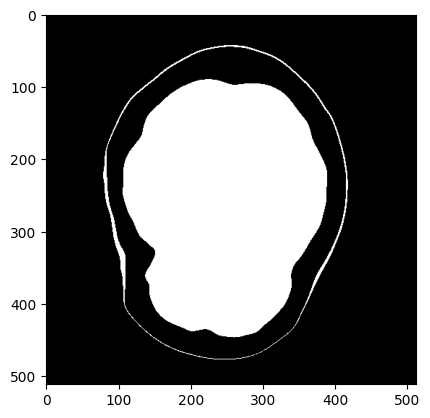

In [ ]:
for pl in range(10):
    plt.imshow(thresh_img_arr[pl,:,:],cmap = 'gray')
    plt.show()

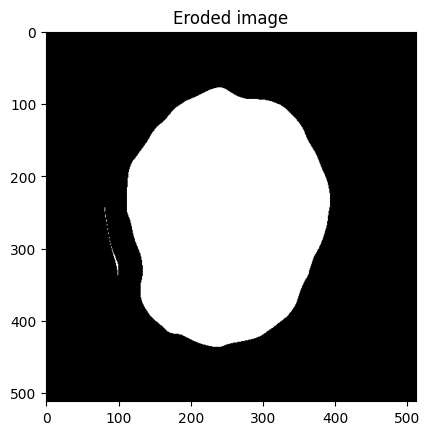

In [ ]:
eroded_img =  erode_img(thresh_img)
eroded_img_arr = sitk.GetArrayFromImage(eroded_img)
plt.imshow(eroded_img_arr[eroded_img_arr.shape[0]//2 - 2,:,:],cmap = 'gray')
plt.title('Eroded image')
plt.show()

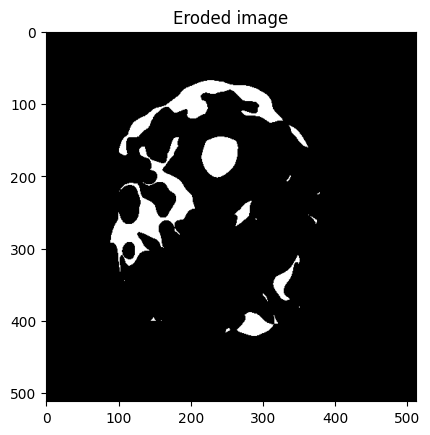

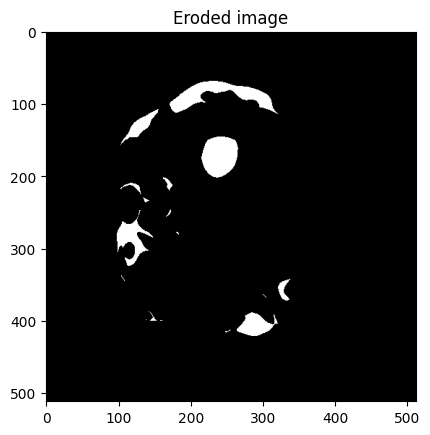

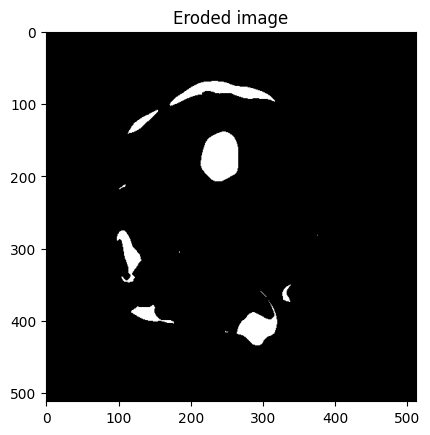

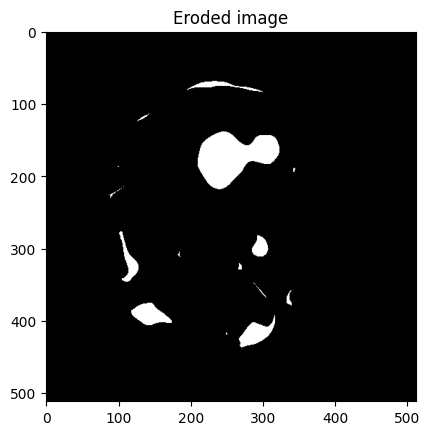

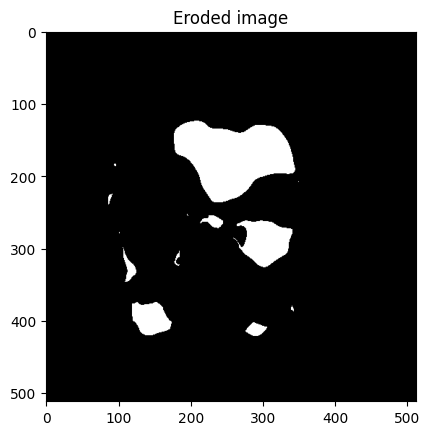

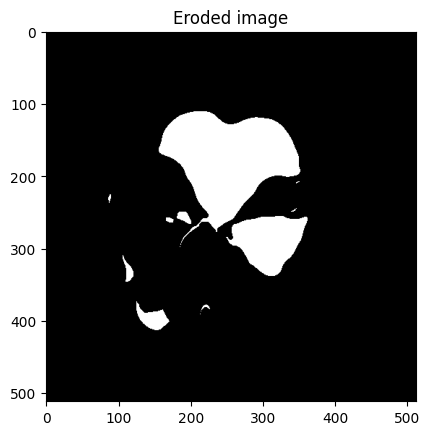

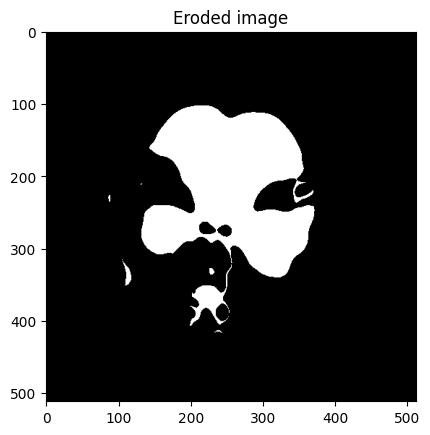

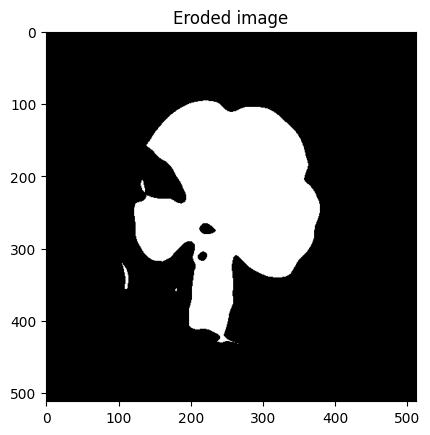

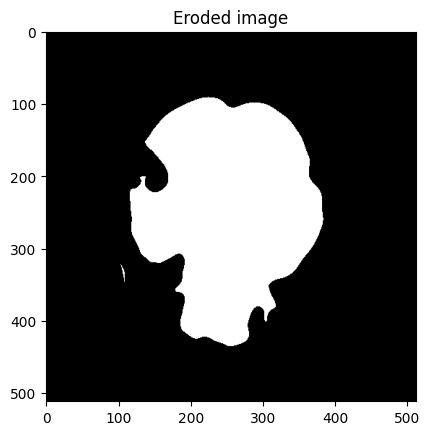

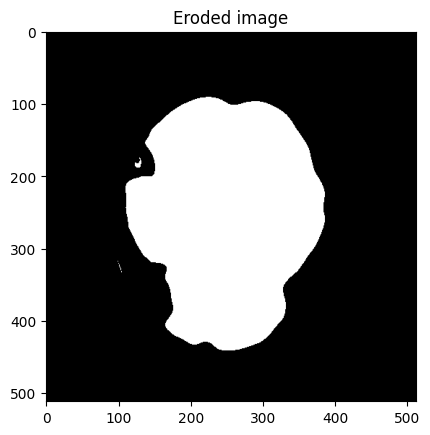

In [ ]:
#Notice how the lower parts of the skull are significantly disconnected after erosion
for pl in range(10):
    plt.imshow(eroded_img_arr[pl,:,:],cmap = 'gray')
    plt.title('Eroded image')
    plt.show()

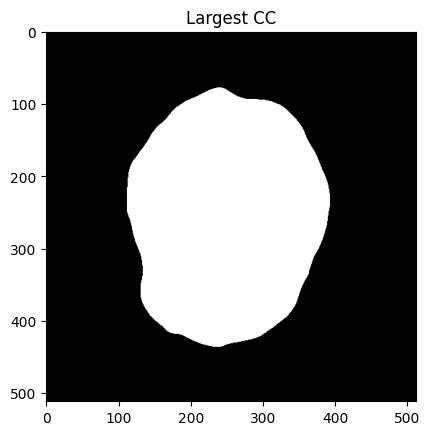

In [ ]:
largest_cc_img = keep_largest_cc(eroded_img)
largest_cc_img_arr = sitk.GetArrayFromImage(largest_cc_img)
plt.imshow(largest_cc_img_arr[largest_cc_img_arr.shape[0]//2 - 2,:,:],cmap = 'gray')
plt.title('Largest CC')
plt.show()

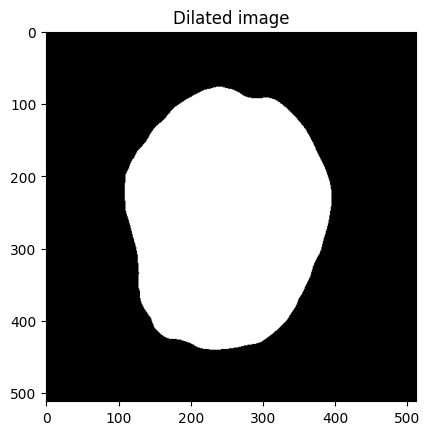

In [ ]:
dilated_img =  dilate_img(largest_cc_img, 1)
dilated_img_arr = sitk.GetArrayFromImage(dilated_img)
plt.imshow(dilated_img_arr[dilated_img_arr.shape[0]//2 - 2,:,:],cmap = 'gray')
plt.title('Dilated image')
plt.show()

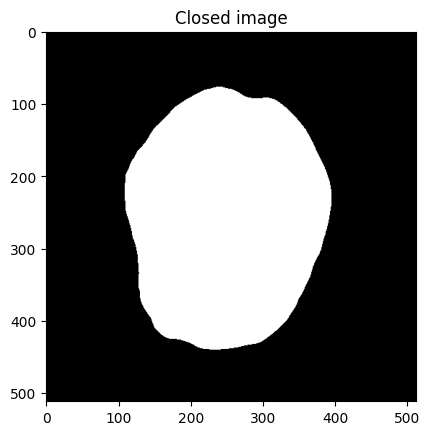

In [ ]:
closed_img_mask = morphology_close(dilated_img)
closed_img_arr = sitk.GetArrayFromImage(closed_img_mask)
plt.imshow(closed_img_arr[closed_img_arr.shape[0]//2 - 2,:,:],cmap = 'gray')
plt.title('Closed image')
plt.show()

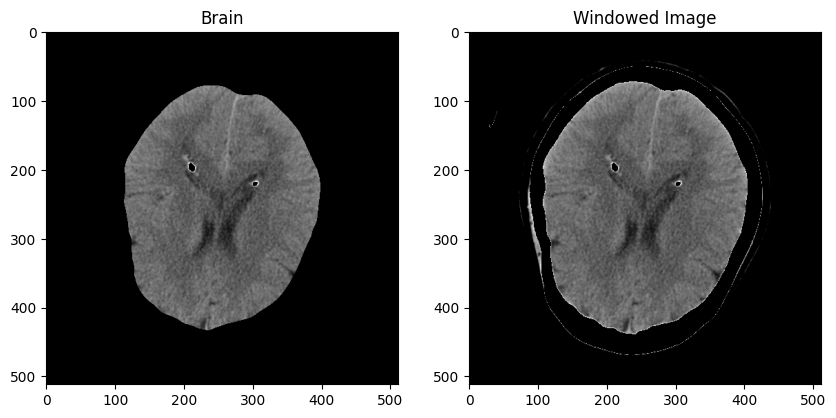

In [ ]:
fig, ax = plt.subplots(figsize = (10,20), ncols = 2, nrows = 1)
brain_img =  skull_strip(img, closed_img_mask)
brain_img_arr = sitk.GetArrayFromImage(brain_img)
brain_img_arr_win = np.where((brain_img_arr < 0) | (brain_img_arr > 100), 0, brain_img_arr)
ax[0].imshow(brain_img_arr_win[brain_img_arr_win.shape[0]//2,:,:],cmap = 'gray')
ax[0].set_title('Brain')
ax[1].imshow(img_arr_win[img_arr_win.shape[0]//2,:,:],cmap = 'gray')
ax[1].set_title('Windowed Image')
plt.show()

Registration with SITK

<img src = "https://docs.google.com/uc?export=download&id=133zcbuUSXQ8wmLcXdBsUJE5TG0QnhL_U" width = "500 px" height = "275 px">


1.   Bringing images into spatial correspondence
2.   Find the spatial mapping (rigid or nonrigid) which optimally maps a
     "moving" image (input scan) to a "fixed" image (reference template)
3.   Essentially Solving an optimization problem, once the transformation has
     been parameterized.
4.   We have to pick a cost function which will give us a sense of how close
     the images are getting, as this process usually proceeds in an iterative scheme. Also need a tolerance for the error.
5.   Optimizers for these cost functions take the form of the familiar gradient
     descent.
6.   What are sampling strategies and multi-resolution schemes?
7.   What are some pitfalls in registration?
8.   Applications of these include - intra and inter-patient scan comparisons,
     standard alignment in neurosurgical procedures, radiation therapy.
9.   Can even be applied to segmentation.

Let us walk through the recommended course of actions and discuss the above points for successful image registration



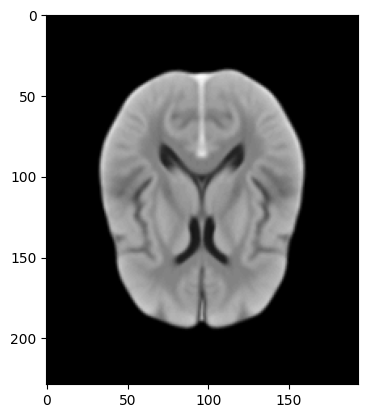

In [ ]:
#How does the template look like? - An "averaged" scan
ref_img_arr = sitk.GetArrayFromImage(ref_img)
ref_img_arr_win = np.where((ref_img_arr < 0) | (ref_img_arr > 100), 0, ref_img_arr)
plt.imshow(ref_img_arr_win[ref_img_arr_win.shape[0]//2, :, :], cmap = 'gray')
plt.show()

In [ ]:
brain_img_iso = resample_img(brain_img, [1,1,1], dimension = 3) #isotropic resample

In [ ]:
brain_img_iso.GetSpacing()

(1.0, 1.0, 1.0)

In [ ]:
#Let us center align the input scan to the template to not "waste" degrees of freedom provided by the rigid registration
brain_img_iso_cen = brain_img_iso.TransformContinuousIndexToPhysicalPoint([x/2 for x in brain_img_iso.GetSize()])
translation = [(x-y) for x,y in zip(brain_img_iso_cen, ref_center)]

In [ ]:
brain_img_cen_aligned = translate_resample_with_original_dc(brain_img_iso, translation)

In [ ]:
brain_img_cen_aligned.TransformContinuousIndexToPhysicalPoint([x/2 for x in brain_img_cen_aligned.GetSize()]), ref_center

((-0.5, 17.5, 18.5), (-0.5, 17.5, 18.5))

In [ ]:
#Check directions.
brain_img_cen_aligned.GetDirection(), ref_img.GetDirection()

((1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0),
 (-1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0))

Can you resample the images to have the same orientation with rotation?

<img src = "https://docs.google.com/uc?export=download&id=1eVQD7CwvawJ6sHROcIo3TiW5l6ihUBXE" width = "275 px" height = "275 px">

In [ ]:
#How about flipping?
brain_img_cen_aligned_arr = sitk.GetArrayFromImage(brain_img_cen_aligned)
brain_img_cen_aligned_arr_win = np.where((brain_img_cen_aligned_arr < 0) | (brain_img_cen_aligned_arr > 100), 0, brain_img_cen_aligned_arr)
brain_img_cen_aligned_arr_flipped = brain_img_cen_aligned_arr[:, :, ::-1]
brain_img_flipped = sitk.GetImageFromArray(brain_img_cen_aligned_arr_flipped)
brain_img_flipped.SetDirection(ref_img.GetDirection())

In [ ]:
brain_img_flipped.GetDirection(), ref_img.GetDirection()

((-1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0),
 (-1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0))

In [ ]:
# Cast both images to the same pixel type
ref_img = sitk.Cast(ref_img, sitk.sitkFloat32)
brain_img_flipped = sitk.Cast(brain_img_flipped, sitk.sitkFloat32)

In [ ]:
def rigid_registration(ref_img, moving_img):
  #Initialize the rigid transform (translation + rotation)
  rigid_transform = sitk.CenteredTransformInitializer(
                        ref_img, moving_img, sitk.AffineTransform(3),
                        sitk.CenteredTransformInitializerFilter.GEOMETRY
                    )

  registration = sitk.ImageRegistrationMethod()

  #Optimization metric
  registration.SetMetricAsMattesMutualInformation(numberOfHistogramBins=50)

  #Set number of random samples and strategies to sample points
  registration.SetMetricSamplingStrategy(registration.RANDOM)
  registration.SetMetricSamplingPercentage(0.01)

  #Set interpolator
  registration.SetInterpolator(sitk.sitkLinear)

  # Optimizer settings.
  registration.SetOptimizerAsRegularStepGradientDescent(
      learningRate=1.0,
      minStep=1e-4,
      numberOfIterations=100,
      gradientMagnitudeTolerance=1e-8
  )

  registration.SetOptimizerScalesFromPhysicalShift()

  # Setup for the multi-resolution framework (3 levels)
  registration.SetShrinkFactorsPerLevel(shrinkFactors=[4,2,1])
  registration.SetSmoothingSigmasPerLevel(smoothingSigmas=[2,1,0])

  registration.SetInitialTransform(rigid_transform)

  # Execute registration
  final_transform = registration.Execute(ref_img, moving_img)

  print(f"Final metric value: {registration.GetMetricValue()}")
  print(f"Optimizer's stopping condition, {registration.GetOptimizerStopConditionDescription()}")

  # Resample the moving image using the final transform
  resampled_moving = sitk.Resample(moving_img, ref_img, final_transform, sitk.sitkLinear, 0.0, ref_img.GetPixelID())

  return resampled_moving

In [ ]:
resampled_moving = rigid_registration(ref_img, brain_img_flipped)

Final metric value: -0.31651858145748807
Optimizer's stopping condition, RegularStepGradientDescentOptimizerv4: Maximum number of iterations (100) exceeded.


In [ ]:
resampled_moving_arr = sitk.GetArrayFromImage(resampled_moving)
resampled_moving_arr_win = np.where((resampled_moving_arr < 0) | (resampled_moving_arr > 100), 0, resampled_moving_arr)

In [ ]:
np.min(resampled_moving_arr), np.max(resampled_moving_arr)

(np.float32(-578.6352), np.float32(427.0465))

In [ ]:
brain_img_iso_arr = sitk.GetArrayFromImage(brain_img_iso)
brain_img_iso_arr_win = np.where((brain_img_iso_arr < 0) | (brain_img_iso_arr > 100), 0, brain_img_iso_arr)

brain_img_flipped_arr = sitk.GetArrayFromImage(brain_img_flipped)
brain_img_flipped_arr_win = np.where((brain_img_flipped_arr < 0) | (brain_img_flipped_arr > 100), 0, brain_img_flipped_arr)

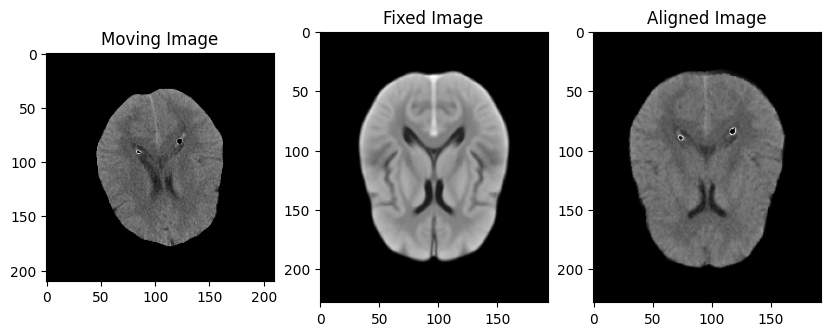

In [ ]:
fig, ax = plt.subplots(figsize = (10,20), ncols = 3, nrows = 1)
ax[0].imshow(brain_img_flipped_arr_win[brain_img_flipped_arr_win.shape[0]//2, :, :], cmap = 'gray')
ax[0].set_title('Moving Image')
ax[1].imshow(ref_img_arr_win[ref_img_arr_win.shape[0]//2, :, :], cmap = 'gray')
ax[1].set_title('Fixed Image')
ax[2].imshow(resampled_moving_arr_win[resampled_moving_arr_win.shape[0]//2,:,:],cmap = 'gray')
ax[2].set_title('Aligned Image')
plt.show()

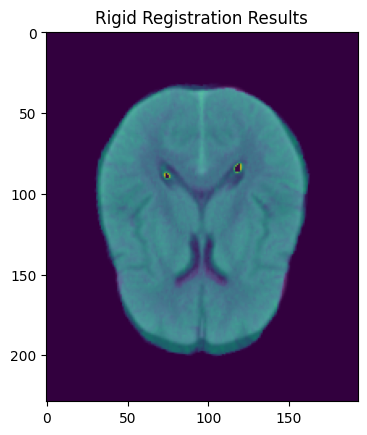

In [ ]:
plt.imshow(ref_img_arr_win[ref_img_arr_win.shape[0]//2, :, :], cmap = 'gray')
plt.imshow(resampled_moving_arr_win[resampled_moving_arr_win.shape[0]//2,:,:],alpha = .75)
plt.title('Rigid Registration Results')
plt.show()